## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [9]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [10]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

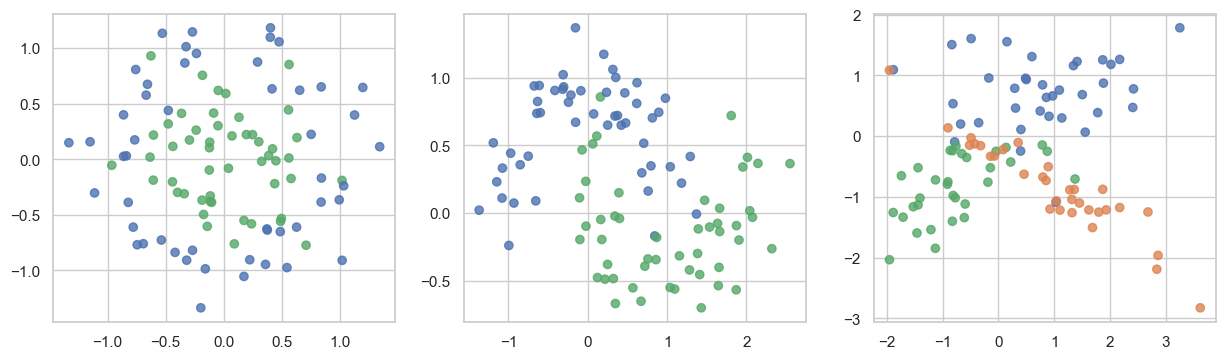

In [11]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [12]:
def plot_surface(plt, clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

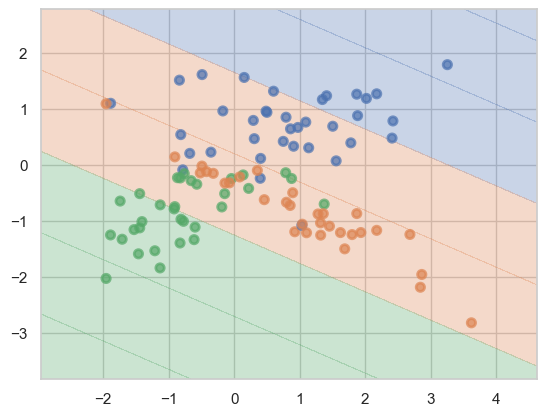

In [13]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(plt, lr, X, y)

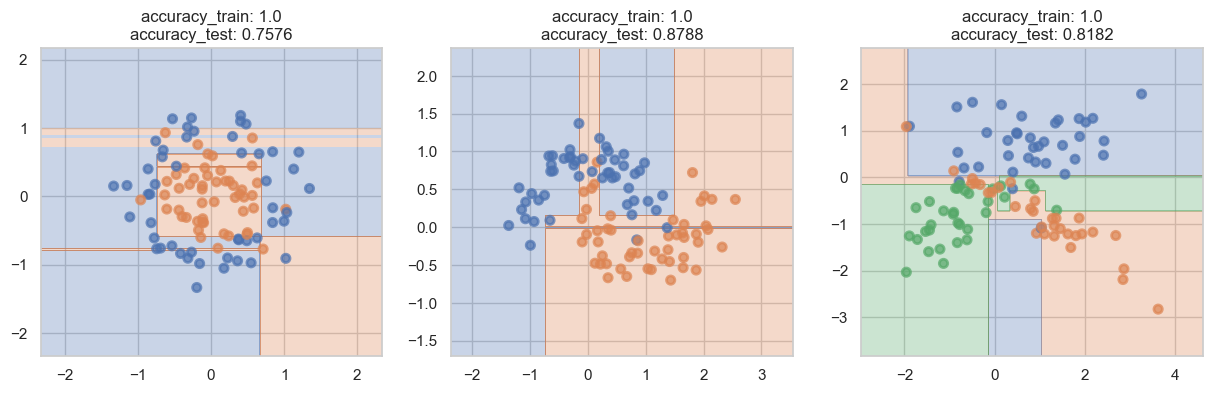

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i in range(3):
    data = datasets[i]
    X, y = data[0], data[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    plot_surface(ax[i], clf, X, y)
    ax[i].set_title(f'accuracy_train: {round(accuracy_score(y_train, clf.predict(X_train)), 4)}\n\
accuracy_test: {round(accuracy_score(y_test, clf.predict(X_test)), 4)}')

__Ответ:__ На тестовых выборках точность хуже чем на обучающихсня. Так как на области одного класса попадают области другого класса, то можно сделать вывод о том, что модель переобучается

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [15]:
def decision_tree(data, max_depth, min_samples_leaf):
    fig, ax = plt.subplots(3, 3, figsize=(16, 16))
    plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

    for i in range(3):
        for j in range(3):
            X, y = data[0], data[1]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
            clf = DecisionTreeClassifier(max_depth = max_depth[j], min_samples_leaf = min_samples_leaf[i])
            clf.fit(X_train, y_train)
            plot_surface(ax[i][j], clf, X, y)
            ax[i][j].set_title(f'max_depth: {max_depth[j]}\nmin_samples_leaf: {min_samples_leaf[i]}')
            ax[i][j].set_xlabel(f'accuracy_train: {round(accuracy_score(y_train, clf.predict(X_train)), 3)}\n\
accuracy_test: {round(accuracy_score(y_test, clf.predict(X_test)), 3)}')

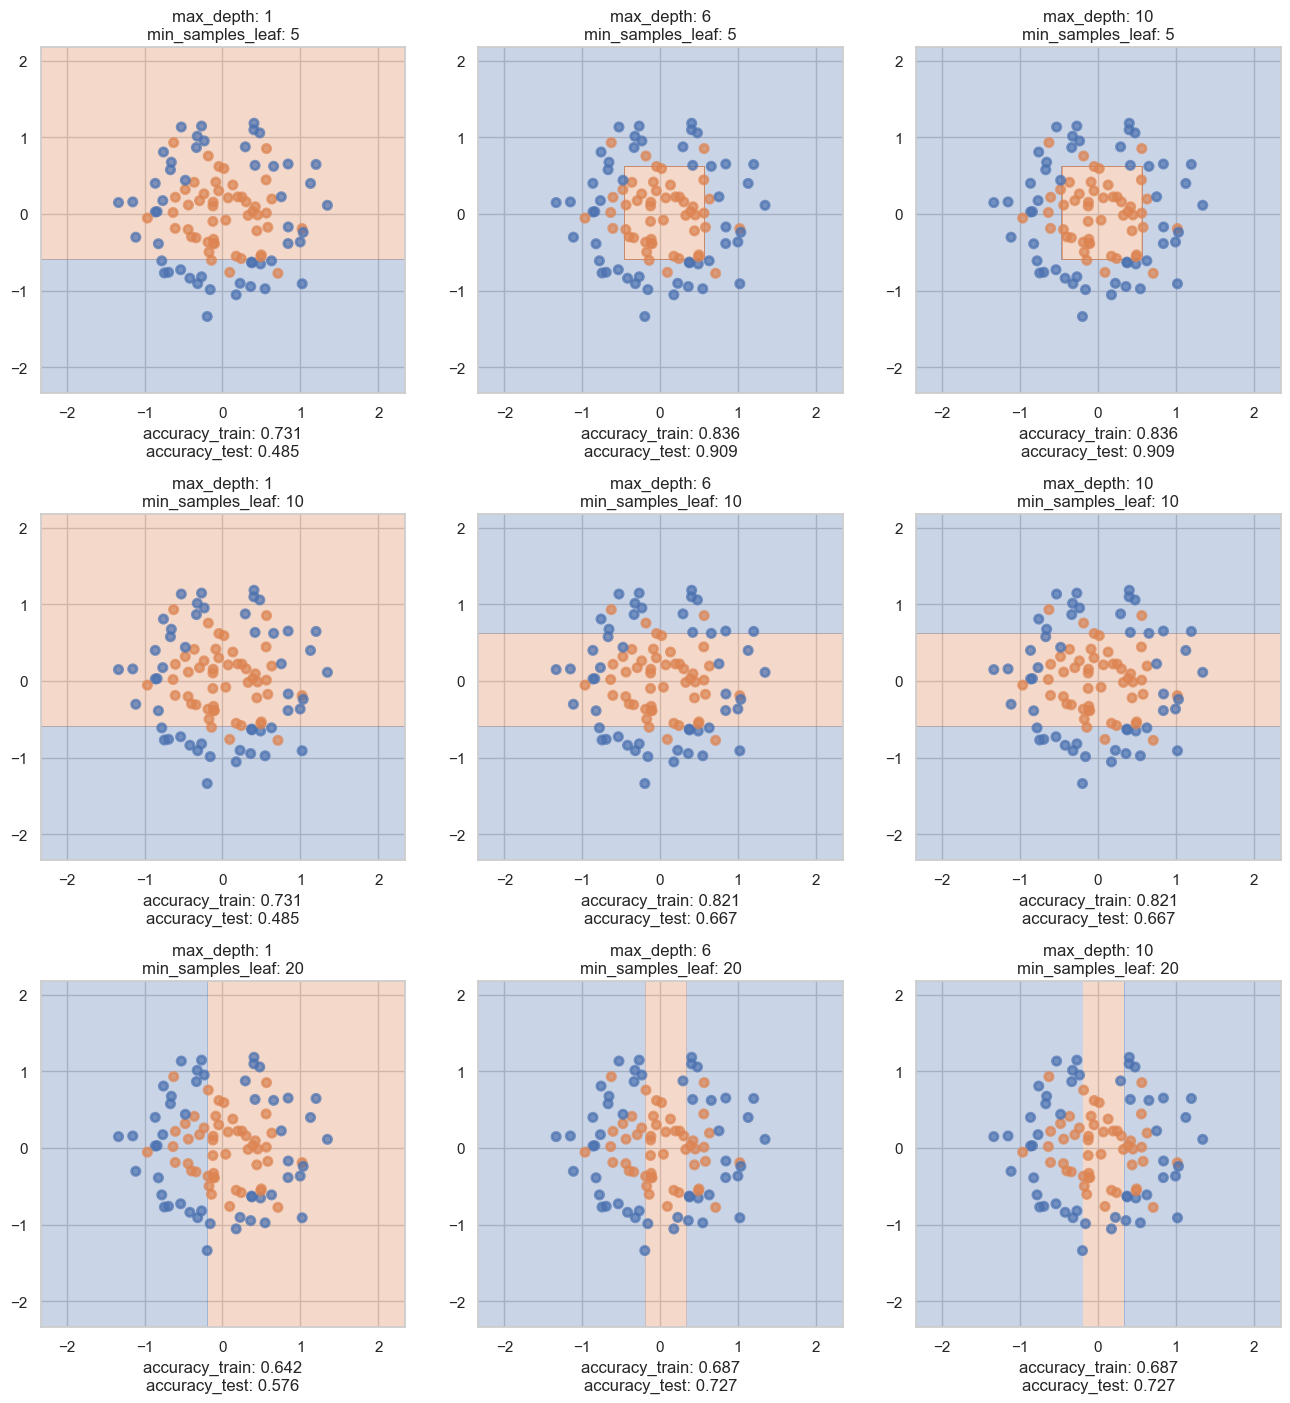

In [16]:
max_depth = [1, 6, 10]
min_samples_leaf = [5 , 10 , 20]

data = datasets[0]
decision_tree(data, max_depth, min_samples_leaf)

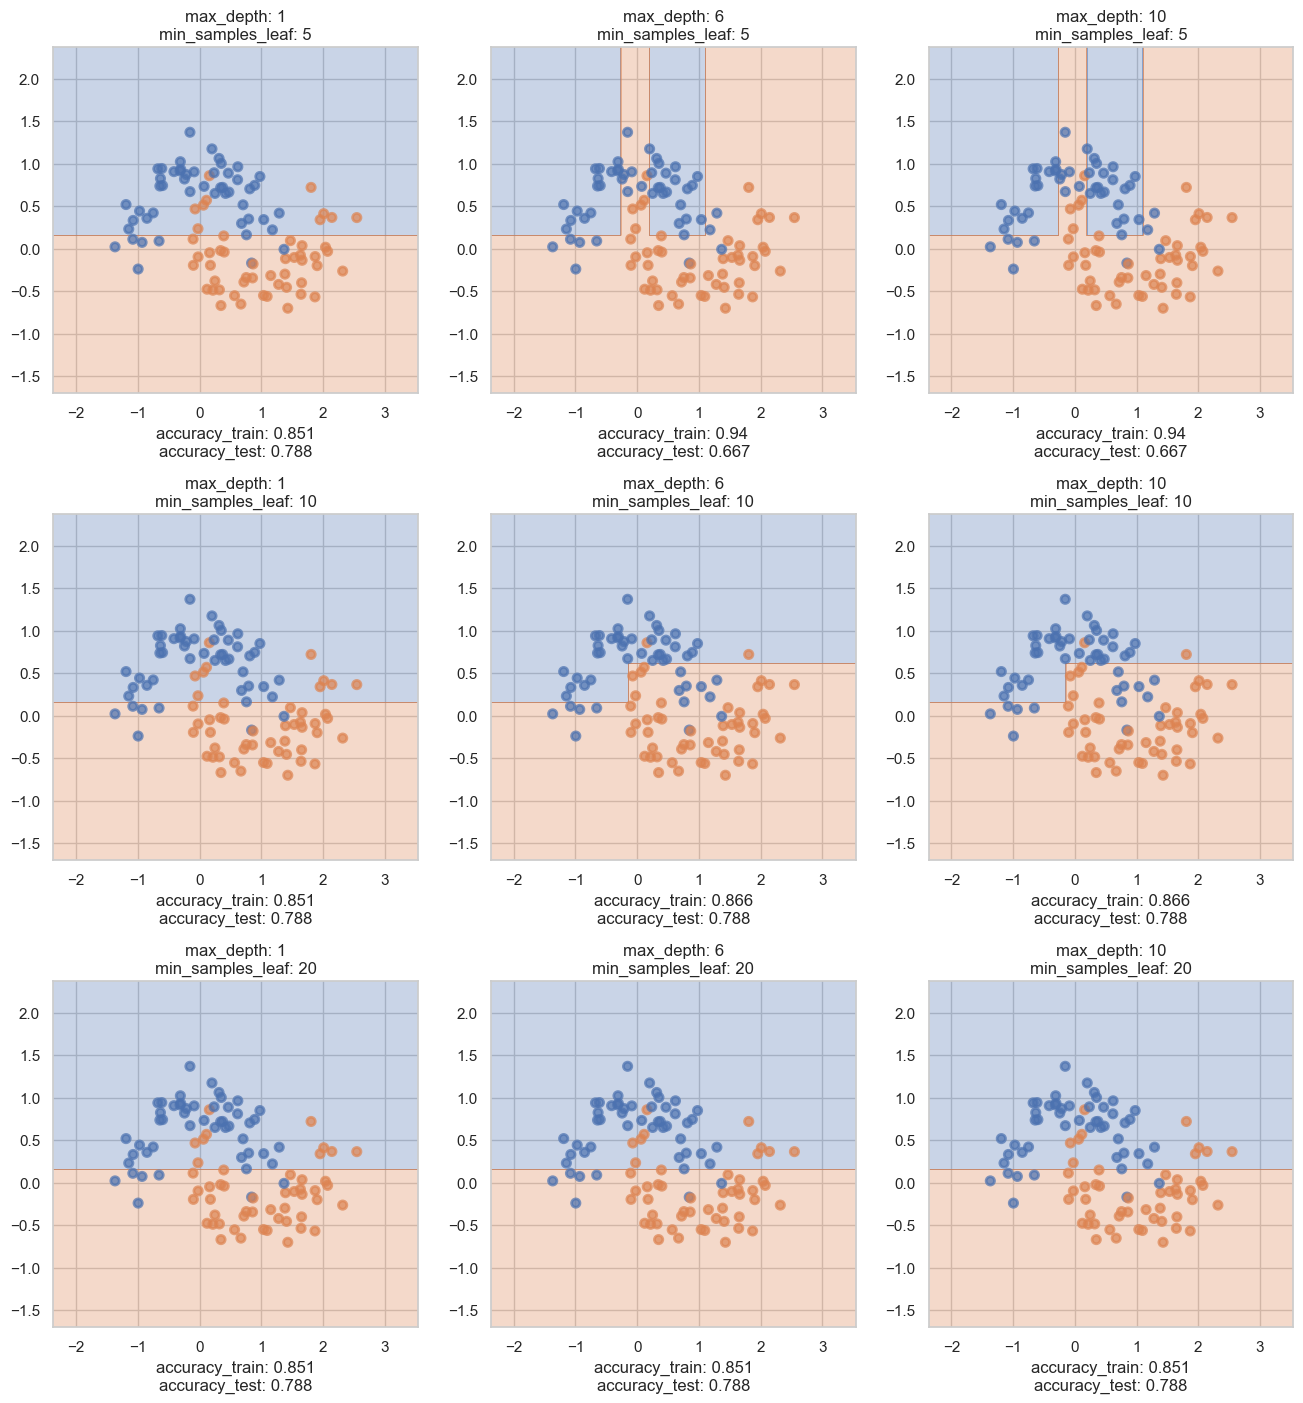

In [17]:
data = datasets[1]
decision_tree(data, max_depth, min_samples_leaf)

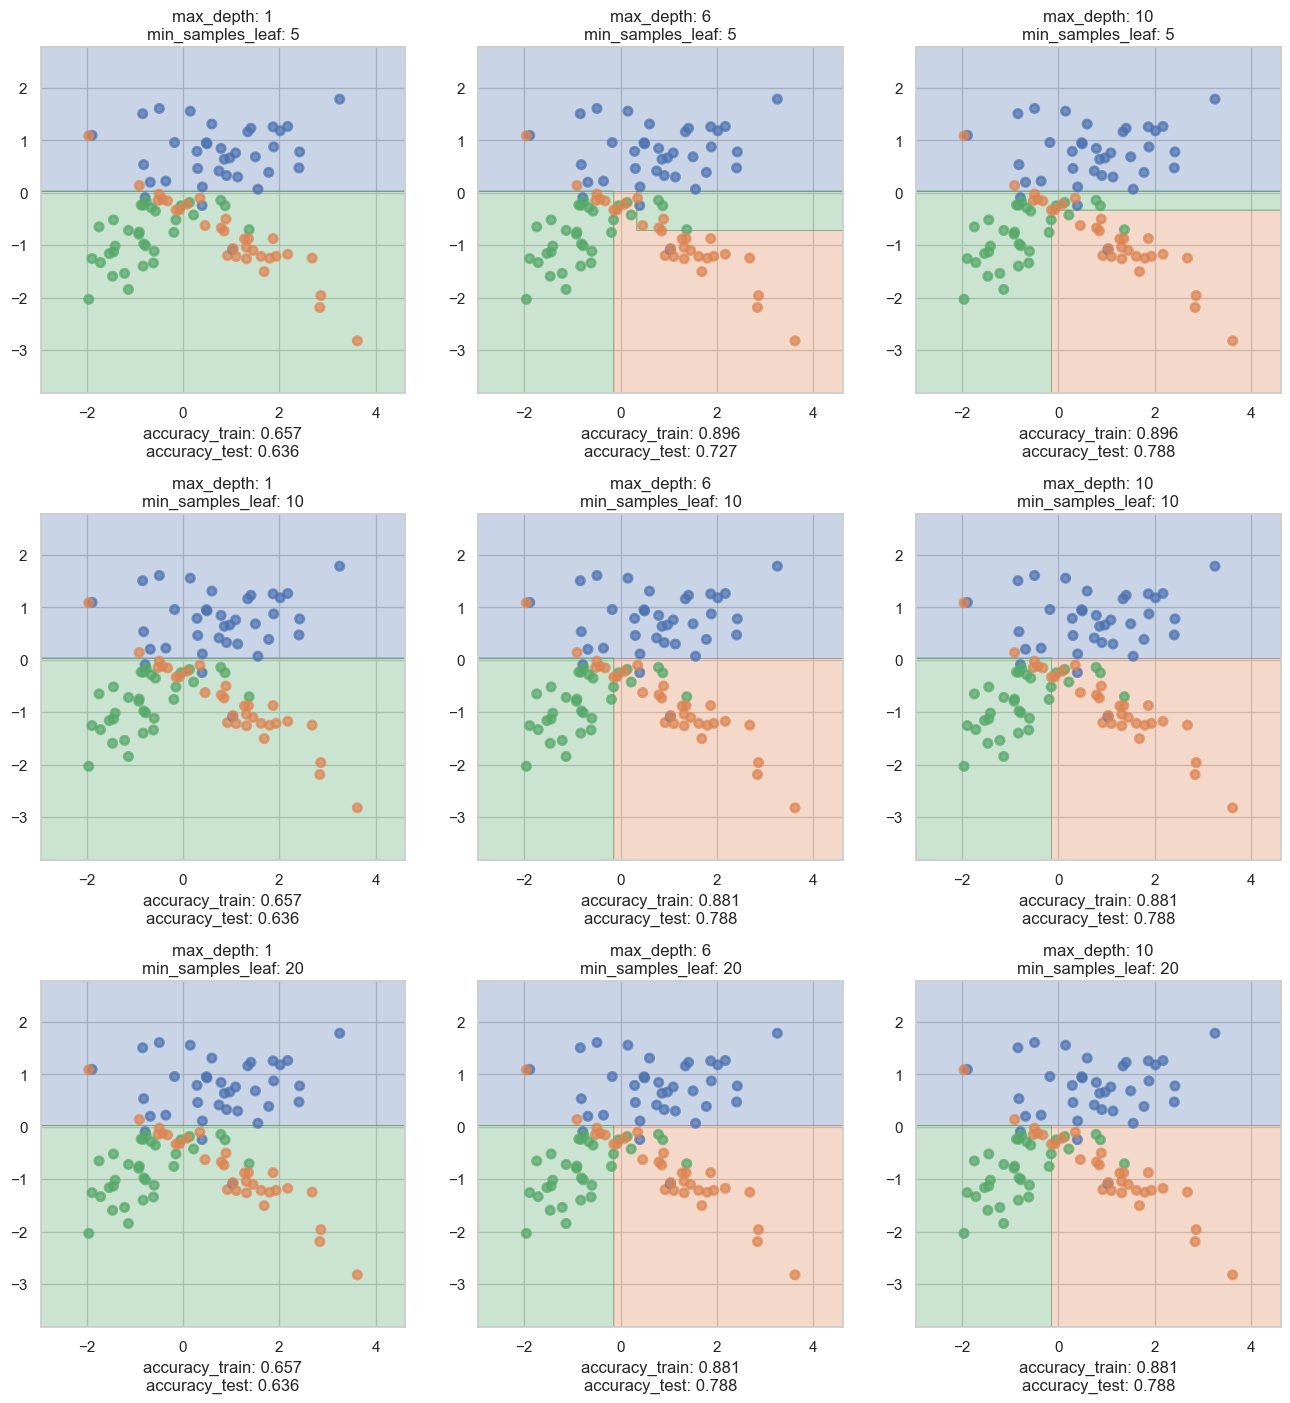

In [18]:
data = datasets[2]
decision_tree(data, max_depth, min_samples_leaf)

__Ответ:__ По рисункам видно, чем больше объектов в листе и меньше глубина дерева, тем мешьше точность   


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Под критерием Джини здесь подразумевается следующая функция:
$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
$R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
 $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

Указания:
* Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
* В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
* Поведение функции в случае константного признака может быть любым.
* При одинаковых приростах Джини нужно выбирать минимальный сплит.
* За наличие в функции циклов балл будет снижен. Векторизуйте! :)

:param feature_vector: вещественнозначный вектор значений признака
:param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

:return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
 разделить на две различные подвыборки, или поддерева
:return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
:return threshold_best: оптимальный порог (число)
:return gini_best: оптимальное значение критерия Джини (число)

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [19]:
import pandas as pd
from hw5code import find_best_split, DecisionTree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder


In [4]:
#! pip install xlrd

In [20]:
file = 'students.xls'

info = pd.read_excel(file, 
                        sheet_name = 0, 
                        index_col = 0)
 
train_data = pd.read_excel(file, 
                        sheet_name = 1, 
                        index_col = 0)

test_data = pd.read_excel(file, 
                        sheet_name = 2, 
                        index_col = 0)
 
info = info.drop('Unnamed: 1', axis=1)

info

,Attribute Information:
Data Set Characteristics: Multivariate,
Number of Instances: 403,STG (The degree of study time for goal object ...
Area: Education,SCG (The degree of repetition number of user f...
Attribute Characteristics: Real,STR (The degree of study time of user for rela...
Number of Attributes: 5,LPR (The exam performance of user for related ...
Associated Tasks: Classification,PEG (The exam performance of user for goal obj...
NaN,UNS (The knowledge level of user)
Class Distribution,NaN
Very Low: 50,NaN
Low:129,NaN


In [21]:
data = pd.concat([train_data, test_data]).reset_index()
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
398,0.90,0.78,0.62,0.32,0.89,1
399,0.85,0.82,0.66,0.83,0.83,1
400,0.56,0.60,0.77,0.13,0.32,0
401,0.66,0.68,0.81,0.57,0.57,1


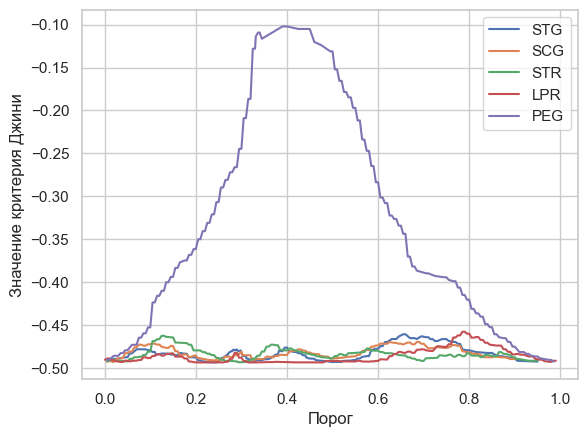

In [22]:
feature = []
target = data.iloc[:, 5]

for i in range(5):
    feature.append(data.iloc[:, i])
    thresholds, ginis, threshold_best, gini_best = find_best_split(feature[i], target)
    plt.xlabel(f'threshold')
    plt.ylabel(f'gini')
    plt.xlabel('Порог')
    plt.ylabel('Значение критерия Джини')
    plt.plot(thresholds, ginis, label=data.iloc[:, i].name)
    
plt.legend()

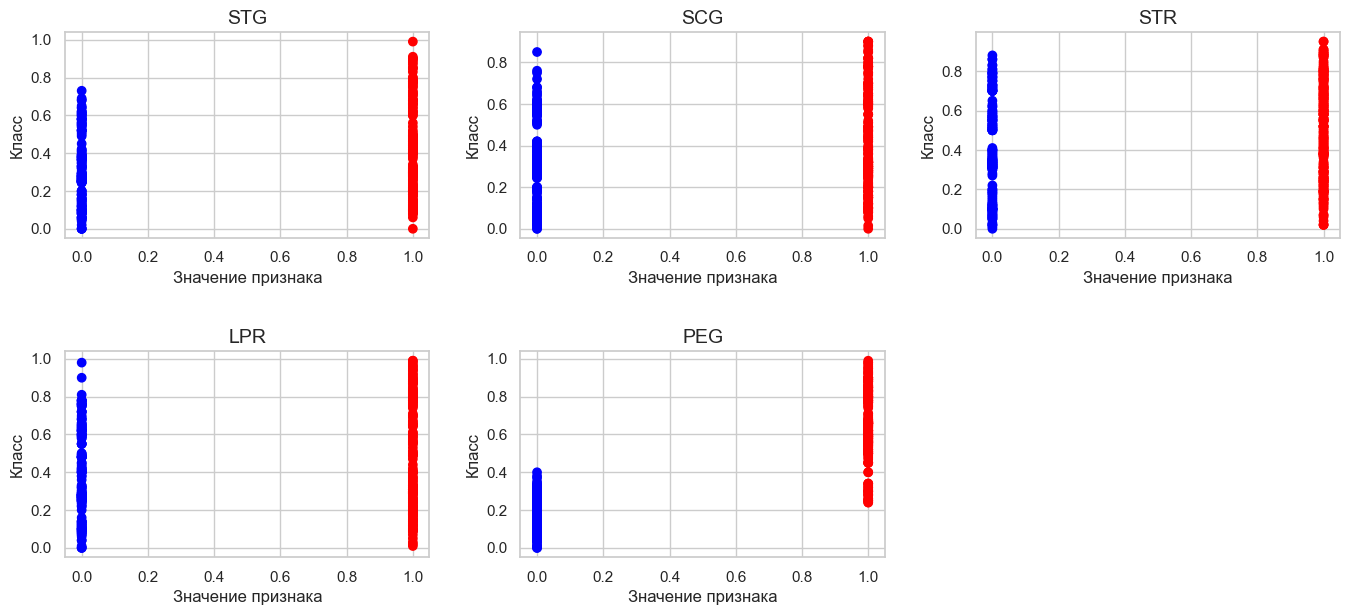

In [23]:
fig = plt.figure(figsize=(15,7))

plt.subplots_adjust(left=0.05, bottom=0.25, right=0.9, top=1, wspace=0.25, hspace=0.55)
columns = 3
rows = 2

for i in range(5):
    fig.add_subplot(rows, columns, i + 1)
    plt.title(data.iloc[:, i].name, fontsize=14)
    plt.xlabel(f'Значение признака')
    plt.ylabel(f'Класс')
    plt.scatter(target, feature[i], c=target, cmap='bwr')

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** По критерию значения Джини, можно разделить выборки на два поддерева по признаку PEG. Это согласуется с результатом визуальной оценки scatter-графиков, так как на графике признака PEG данные четко разделяются по классам.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [30]:
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator

def H(y, R):
    y_1 = y
    y_0 = abs(y - 1)
    y_1 = np.multiply(R, y_1)
    y_0 = np.multiply(R, y_0)
    p0 = np.linalg.norm(y_0, ord=1, axis=1) / np.linalg.norm(R, ord=1, axis=1)
    p1 = np.linalg.norm(y_1, ord=1, axis=1) / np.linalg.norm(R, ord=1, axis=1)
    h = 1 - np.square(p0) - np.square(p1)
    return h

def gini(R_l, R_r, y):
    R = R_l + R_r
    gini_l = np.linalg.norm(R_l, ord=1, axis=1) / np.linalg.norm(R, ord=1, axis=1)
    gini_r = np.linalg.norm(R_r, ord=1, axis=1) / np.linalg.norm(R, ord=1, axis=1)
    h_l = H(y,R_l)
    h_r = H(y,R_r)
    Q = -np.multiply(gini_l, h_l) -np.multiply(gini_r, h_r)
    return Q

def find_best_split(feature_vector, target_vector):

    index = np.argsort(feature_vector)
    feature_vector = np.array(feature_vector)[index]
    target_vector = np.array(target_vector)[index]
    thresholds = (feature_vector[1:] + feature_vector[:-1]) / 2
    thresholds = np.unique(thresholds)

    R_l = (feature_vector) < thresholds.reshape(-1,1)
    R_r = ~R_l
    index = R_l.any(axis=1) & R_r.any(axis=1)
    index = np.squeeze(index.reshape(1, -1))
    thresholds = thresholds[index]
    R_l = np.matrix(feature_vector) < thresholds.reshape(-1,1)
    R_r = ~R_l
    
    m = R_l.shape[0]
    y = np.zeros((m, 1)) + target_vector
    
    if len(R_l) == 0 or len(R_r) == 0:
            return [], [], -np.inf, -np.inf
    
    ginis = gini(R_l, R_r, y)
    best_gini = np.argmax(ginis)
    threshold_best = thresholds[best_gini]
    gini_best = ginis[best_gini]

    return thresholds, ginis, threshold_best, gini_best


class DecisionTree(BaseEstimator):
    def __init__(self, feature_types):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self.feature_types = feature_types

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]): #2
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]): #3
            feature_type = self.feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
                
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                        ratio[key] = current_count / current_click
                    else:
                        current_click = 0
                        ratio[key] = 0
                
                sorted_categories = sorted(ratio.keys(),
                                           key=lambda k: ratio[k]) 
                
                categories_map = dict(zip(sorted_categories,
                                          range(len(sorted_categories))))
                
                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError
            
            if len(feature_vector) == 3:
                continue
                
            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list( map(lambda x: x[0], 
                                filter(lambda x: x[1] < threshold,categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self.feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
            
        elif self.feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
            
        else:
            raise ValueError
            
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"]) #1

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]
        else:
            feature_split = node["feature_split"]
            
            if self.feature_types[feature_split] == "real":
                threshold = node["threshold"]
                if x[feature_split] < threshold:
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])
                
                
            elif self.feature_types[feature_split] == "categorical":
                threshold = node["categories_split"]
                if x[feature_split] in threshold:
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])
                    
            else:
                raise ValueError

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)


In [31]:
features_students = data.iloc[:, :5].to_numpy()
target_students = data.iloc[:, 5].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(features_students, target_students, test_size=0.5, random_state=42)

feature_types = ['real'] * np.array(feature).shape[1]

clf = DecisionTree(feature_types)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9603960396039604

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold


mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
mushrooms.head()


,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [33]:
encoder = LabelEncoder()
mushrooms = mushrooms.apply(encoder.fit_transform)
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [34]:
features_mushrooms = mushrooms.iloc[:, 1:].to_numpy()
target_mushrooms = mushrooms.iloc[:, 0].to_numpy()

mushrooms_types = np.array(['categorical'] * features_mushrooms.shape[1])

clf = DecisionTree(mushrooms_types)

scores = cross_val_score(clf, features_mushrooms, target_mushrooms, cv=10, scoring=make_scorer(accuracy_score))
np.mean(scores)

1.0

__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [35]:
tic_tac = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')    

In [36]:
tic_tac = tic_tac.apply(encoder.fit_transform)
features_tictac = tic_tac.iloc[:, :9].to_numpy()
target_tictac = tic_tac.iloc[:, 9].to_numpy()

tic_tac

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
952,1,2,2,2,1,1,1,2,2,0
953,1,2,1,2,2,1,2,1,2,0
954,1,2,1,2,1,2,2,1,2,0
955,1,2,1,1,2,2,2,1,2,0


In [37]:
cars['unacc'].loc[(cars['unacc'] == 'unacc') | (cars['unacc'] == 'acc')] = 0
cars['unacc'].loc[(cars['unacc'] == 'good') | (cars['unacc'] == 'vgood')] = 1

cars = cars.apply(encoder.fit_transform)
features_cars = cars.iloc[:, :6].to_numpy()
target_cars = cars.iloc[:, 6].to_numpy()
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,0
1,3,3,0,0,2,0,0
2,3,3,0,0,1,1,0
3,3,3,0,0,1,2,0
4,3,3,0,0,1,0,0


In [38]:
nursery['recommend'].loc[(nursery['recommend'] == 'not_recom') | (nursery['recommend'] == 'recommend')] = 0
nursery['recommend'].loc[(nursery['recommend'] == 'very_recom') | (nursery['recommend'] == 'priority')
                         | (nursery['recommend'] == 'spec_prior')] = 1

nursery = nursery.apply(encoder.fit_transform)
features_nursery = nursery.iloc[:, :8].to_numpy()
target_nursery = nursery.iloc[:, 8].to_numpy()
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,2,3,0,0,0,0,0,1,1
1,2,3,0,0,0,0,0,0,0
2,2,3,0,0,0,0,2,2,0
3,2,3,0,0,0,0,2,1,1
4,2,3,0,0,0,0,2,0,0


In [39]:
total_scor = pd.DataFrame(index = ['musrooms','tic tac','cars','nursery'],
                         columns = ['all real', 'all categorical',
                                    'real + onehot', 'sklearn'])
total_scor

,all real,all categorical,real + onehot,sklearn
musrooms,NaN,NaN,NaN,NaN
tic tac,NaN,NaN,NaN,NaN
cars,NaN,NaN,NaN,NaN
nursery,NaN,NaN,NaN,NaN


In [40]:
feature = [features_mushrooms, features_tictac, features_cars, features_nursery]
target = [target_mushrooms, target_tictac, target_cars, target_nursery]

for i in range(4):
    feature_types = ['real'] * feature[i].shape[1]
    clf = DecisionTree(feature_types)
    k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(clf, feature[i], target[i], cv=k_fold, scoring=make_scorer(accuracy_score))
    total_scor['all real'].iloc[i] = np.mean(scores)

total_scor

,all real,all categorical,real + onehot,sklearn
musrooms,1.0,NaN,NaN,NaN
tic tac,0.87364,NaN,NaN,NaN
cars,0.986668,NaN,NaN,NaN
nursery,0.999923,NaN,NaN,NaN


In [41]:
for i in range(4):
    feature_types = ['categorical'] * feature[i].shape[1]
    clf = DecisionTree(feature_types=mushrooms_types)
    k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(clf, feature[i], target[i], cv=k_fold, scoring=make_scorer(accuracy_score))
    total_scor['all categorical'].iloc[i] = np.mean(scores)

total_scor

,all real,all categorical,real + onehot,sklearn
musrooms,1.0,1.0,NaN,NaN
tic tac,0.87364,0.945669,NaN,NaN
cars,0.986668,0.984934,NaN,NaN
nursery,0.999923,0.999923,NaN,NaN


In [42]:
for i in range(4):
    clf = DecisionTreeClassifier()
    k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(clf, feature[i], target[i], cv=k_fold, scoring=make_scorer(accuracy_score))
    total_scor['sklearn'].iloc[i] = np.mean(scores)

total_scor

,all real,all categorical,real + onehot,sklearn
musrooms,1.0,1.0,NaN,1.0
tic tac,0.87364,0.945669,NaN,0.879923
cars,0.986668,0.984934,NaN,0.990728
nursery,0.999923,0.999923,NaN,0.999769


In [43]:
enc = OneHotEncoder(handle_unknown='ignore') 
enc.set_params(sparse=False)

for i in range(4):
    feature[i] = enc.fit_transform(feature[i])
    feature_types = ['real'] * feature[i].shape[1]
    clf = DecisionTree(feature_types)
    k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(clf, feature[i], target[i], cv=k_fold, scoring=make_scorer(accuracy_score))
    total_scor['real + onehot'].iloc[i] = np.mean(scores)

total_scor

,all real,all categorical,real + onehot,sklearn
musrooms,1.0,1.0,0.999754,1.0
tic tac,0.87364,0.945669,0.940461,0.879923
cars,0.986668,0.984934,0.983778,0.990728
nursery,0.999923,0.999923,0.999923,0.999769


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Точность в tic_tac_toe ниже, чем в остальных датасетах, так как классы несбалансированы. 
В остальных датасетах результаты довольно точные
